## **MNIST**

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.8.2


In [3]:
# 데이터 가져오기
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print("학습용 데이터 : x: {}, y:{}".format(x_train.shape, y_train.shape) )
print("테스트 데이터 : x: {}, y:{}".format(x_test.shape, y_test.shape) )

학습용 데이터 : x: (60000, 28, 28), y:(60000,)
테스트 데이터 : x: (10000, 28, 28), y:(10000,)


In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),    # 2D -> 1D
  tf.keras.layers.Dense(128, activation='relu'),    # 활성화 함수 - relu
  tf.keras.layers.Dropout(0.2),                     # Dropout적용
  tf.keras.layers.Dense(10, activation='softmax')   # 활성화 함수 - softmax
])

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model

In [9]:
%%time

model.fit(x_train, y_train, epochs=15)
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2938 - accuracy: 0.9150
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1431 - accuracy: 0.9577
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1070 - accuracy: 0.9678
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0904 - accuracy: 0.9720
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0767 - accuracy: 0.9756
Epoch 6/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0667 - accuracy: 0.9787
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0599 - accuracy: 0.9807
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0552 - accuracy: 0.9822
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0491 - accuracy: 0.9842
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.043

## **fashion MNIST**

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.8.2


In [3]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(np.__version__)

2.8.2
1.21.6


In [4]:
fashion_mnist = keras.datasets.fashion_mnist


# 4개의 데이터 셋 반환(numpy 배열)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
print("학습용 데이터 : x: {}, y:{}".format(train_images.shape, train_labels.shape) )
print("테스트 데이터 : x: {}, y:{}".format(test_images.shape, test_labels.shape) )

학습용 데이터 : x: (60000, 28, 28), y:(60000,)
테스트 데이터 : x: (10000, 28, 28), y:(10000,)


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
print("학습용 데이터의 레이블 ", np.unique(train_labels) )

학습용 데이터의 레이블  [0 1 2 3 4 5 6 7 8 9]


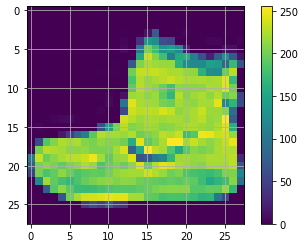

In [8]:
plt.figure()
plt.imshow(train_images[0])   # 첫번째 이미지 데이터
plt.colorbar()     # 색깔 표시바 
plt.grid(True)   # grid 선 
plt.show()

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

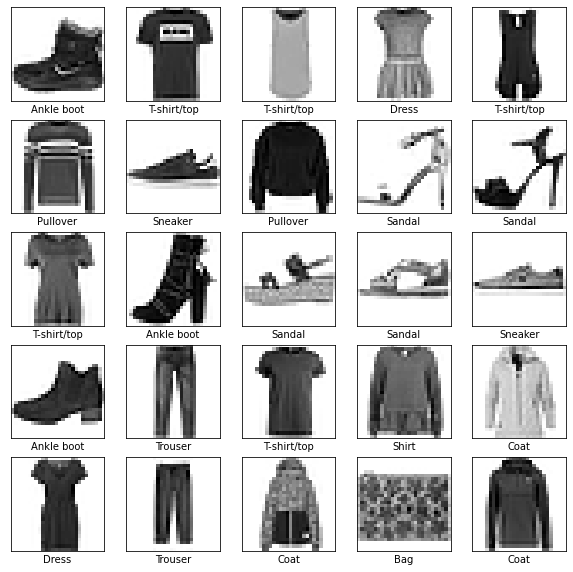

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)  # 그래프의 표시 위치
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)  # 그리드선
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4983 - accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3760 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3379 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3131 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2944 - accuracy: 0.8902
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2811 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2683 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2566 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2468 - accuracy: 0.9061
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.3293 - accuracy: 0.8857 - 663ms/epoch - 2ms/step

테스트 정확도: 0.885699987411499


In [14]:
predictions = model.predict(test_images)

In [15]:
predictions[0]

array([4.4548556e-09, 3.7387191e-10, 1.4685230e-09, 1.4031391e-12,
       1.8957254e-09, 6.4400939e-04, 1.6295401e-08, 1.3976913e-02,
       2.0621755e-09, 9.8537910e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
test_labels[0]

9

In [18]:
### 10개의 데이터에 대해 확인
np.argmax(predictions, axis=1)[0:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [19]:
### 10개의 데이터에 대한 실제값
test_labels[0:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)  # 이미지 표시 

  # 정확하게 맞춰을 경우, blue(파란), 아니면 red(적색)으로 표시
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [21]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

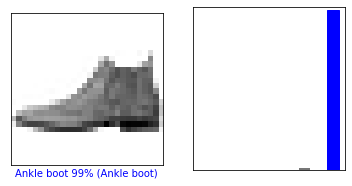

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)  # 이미지 표시 
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)        # 막대 그래프 표시
plt.show()

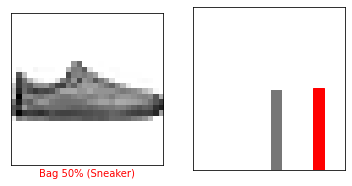

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

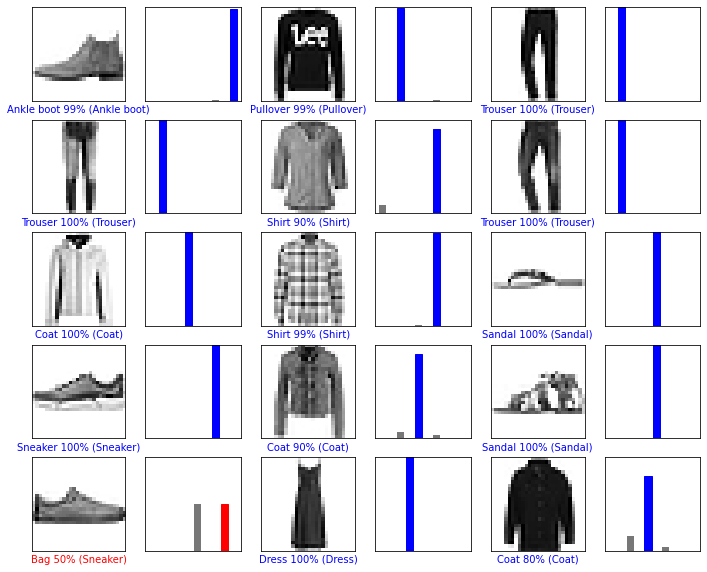

In [24]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [25]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]
print(img.shape)

# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))
print(img.shape)

(28, 28)
(1, 28, 28)


[[4.4548640e-09 3.7387260e-10 1.4685230e-09 1.4031337e-12 1.8957289e-09
  6.4401038e-04 1.6295433e-08 1.3976920e-02 2.0621833e-09 9.8537910e-01]]


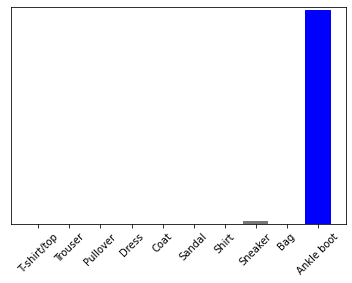

In [26]:
predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [27]:
idx = np.argmax(predictions_single[0])
print(idx)
print(class_names[idx])

9
Ankle boot


## **fashion MNIST 모델 성능 개선**

## ** CODE 페이지 없음**

## **캐글(Dogs vs. Cats)**

In [28]:
import tensorflow as tf  

# 디렉터리 생성 및 파일 복사
import os  
import shutil
import zipfile # 압축 파일 해제

# 딥러닝 최적화 알고리즘, 이미지 제너레이터
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [30]:
print(os.listdir("../input"))

FileNotFoundError: ignored

In [31]:
path_tr = "../input/dogs-vs-cats/train.zip"   # 학습용 데이터 파일
#shutil.rmtree('/tmp')

path_test = "../input/dogs-vs-cats/test1.zip"   # 테스트용 데이터 파일
#shutil.rmtree('/tmp')

# train.zip 파일 압축 풀기
local_zip = path_tr
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('.')
zip_ref.close()

# test1.zip 파일 압축 풀기
local_zip = path_test
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('.')
zip_ref.close()

FileNotFoundError: ignored